In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import awkward as ak
import uproot 
import mplhep as hep
import hist
import os

from UtilityAndConst import *
from Functions import *

dir = "/Users/francescolarovere/Documents/Tesi-Triennale/Dati"
os.chdir(dir)

hep.style.use("CMS")
np.set_printoptions(threshold=np.inf)

In [5]:
LS133 = "./ntupleStubsBmtfGmt_LS133.root"
LS263 = "./ntupleStubsBmtfGmt_LS263.root"
LS264 = "./ntupleStubsBmtfGmt_LS264.root"
LS306 = "./ntupleStubsBmtfGmt_LS306.root"

#Open file
gmt_awk_LS133 = OpenRootFile(LS133, gmt_features)
gmt_awk_LS263 = OpenRootFile(LS263, gmt_features)
gmt_awk_LS264 = OpenRootFile(LS264, gmt_features)
gmt_awk_LS306 = OpenRootFile(LS306, gmt_features)

bmtf_awk_LS133 = OpenRootFile(LS133, bmtf_features)
bmtf_awk_LS263 = OpenRootFile(LS263, bmtf_features)
bmtf_awk_LS264 = OpenRootFile(LS264, bmtf_features)
bmtf_awk_LS306 = OpenRootFile(LS306, bmtf_features)

# Molteplicità di Stub per GMT

In [9]:
nGmtMuons_LS133 = gmt_awk_LS133.nGmtMuons
nGmtMuons_LS263 = gmt_awk_LS263.nGmtMuons
nGmtMuons_LS264 = gmt_awk_LS264.nGmtMuons
nGmtMuons_LS306 = gmt_awk_LS306.nGmtMuons

In [11]:
nGmtLS133_count = ConvertToHz(np.bincount(nGmtMuons_LS133))
nGmtLS263_count = ConvertToHz(np.bincount(nGmtMuons_LS263))
nGmtLS264_count = ConvertToHz(np.bincount(nGmtMuons_LS264))
nGmtLS306_count = ConvertToHz(np.bincount(nGmtMuons_LS306))

nGmt_Array = ak.Array([nGmtLS133_count, nGmtLS263_count, nGmtLS264_count, nGmtLS306_count])

MaxStubs = max(len(nGmt_Array[0]), len(nGmt_Array[1]), len(nGmt_Array[2]), len(nGmt_Array[3]))

#Filled Array per eseguire una somma vettoriale dei 4 array
FnGmtLS133 = ak.fill_none(ak.pad_none(nGmt_Array[0], MaxStubs, axis = 0, clip=True), 0)
FnGmtLS263 = ak.fill_none(ak.pad_none(nGmt_Array[1], MaxStubs, axis = 0, clip=True), 0)
FnGmtLS264 = ak.fill_none(ak.pad_none(nGmt_Array[2], MaxStubs, axis = 0, clip=True), 0)
FnGmtLS306 = ak.fill_none(ak.pad_none(nGmt_Array[3], MaxStubs, axis = 0, clip=True), 0)

nGmt = FnGmtLS133 + FnGmtLS263 + FnGmtLS264 + FnGmtLS306
print(nGmt[:])

[4.07e+05, 8.88e+04, 1.35e+03, 19.1, 0.428]


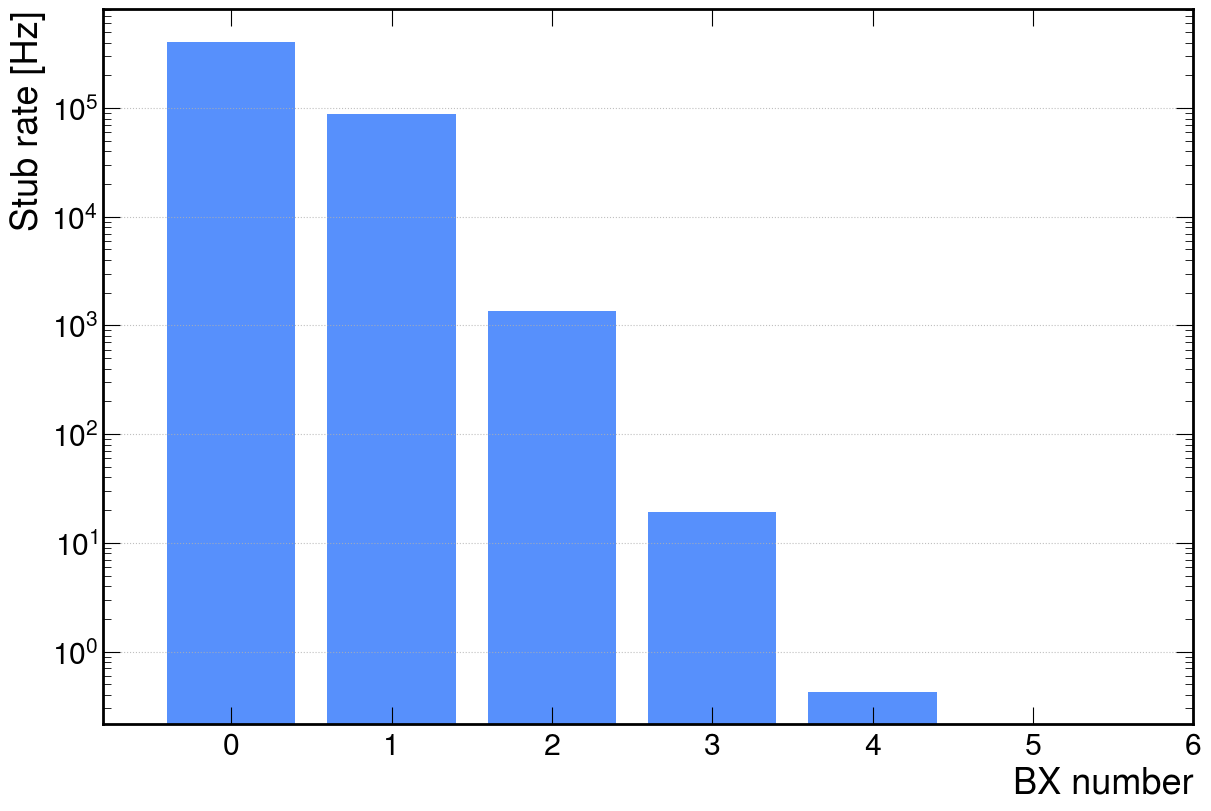

In [14]:
fig, ax = plt.subplots(figsize=(12, 8), constrained_layout=True)

set_label_font(ax, FONTSIZE)
set_tick_font(ax, FONTSIZE - 2)
draw_cms_label(ax, fontsize= FONTSIZE, label="Work in Progress", rlabel="L1 Trigger Scouting 2024 (13.6 TeV)")

ax.bar(np.arange(len(nGmt[:])), nGmt[:])

#ax.set_xticks(ticks=np.arange(9), labels=np.arange(1, 10, 1))
ax.tick_params(axis='x', which='minor', length=0)
ax.set_xlabel('BX number')
ax.set_ylabel('Stub rate [Hz]')
ax.set_xlim(-0.8, 6)
ax.grid(visible=True, axis='y')
ax.set_yscale('log')

# $\Delta R$

In [17]:
#Carico Phi ed Eta da Gmt e Bmtf
GmtPhi_LS133 = gmt_awk_LS133.gmtPhi
GmtPhi_LS263 = gmt_awk_LS263.gmtPhi
GmtPhi_LS264 = gmt_awk_LS264.gmtPhi
GmtPhi_LS306 = gmt_awk_LS306.gmtPhi

GmtEta_LS133 = gmt_awk_LS133.gmtEta
GmtEta_LS263 = gmt_awk_LS263.gmtEta
GmtEta_LS264 = gmt_awk_LS264.gmtEta
GmtEta_LS306 = gmt_awk_LS306.gmtEta

BmtfEta_LS133 = bmtf_awk_LS133.bmtfEta
BmtfEta_LS263 = bmtf_awk_LS263.bmtfEta
BmtfEta_LS264 = bmtf_awk_LS264.bmtfEta
BmtfEta_LS306 = bmtf_awk_LS306.bmtfEta

BmtfPhi_LS133 = bmtf_awk_LS133.bmtfPhi
BmtfPhi_LS263 = bmtf_awk_LS263.bmtfPhi
BmtfPhi_LS264 = bmtf_awk_LS264.bmtfPhi
BmtfPhi_LS306 = bmtf_awk_LS306.bmtfPhi


In [22]:
print(GmtPhi_LS133)
print(BmtfPhi_LS133)

[[], [], [], [], [], [], [], [], [], ..., [0.0327], [], [], [], [], [], [], []]
[[], [], [], [], [], [], [], [], [], ..., [0.0327], [], [], [], [], [], [], []]
